# Quantum transforms and noise: Energy dissipation

When we program quantum devices in PennyLane, we assume that gates work exactly as expected. This assumption is not entirely true. Gates are noisy: our qubit interacts with the quantum state of its surroundings and its state may change! For example, a qubit could dissipate energy into the environment.

Let us study a toy model of such a process. We model energy dissipation by gates in a **one-qubit circuit** by adding the following interaction with the environment **after every gate**.

<img src=" 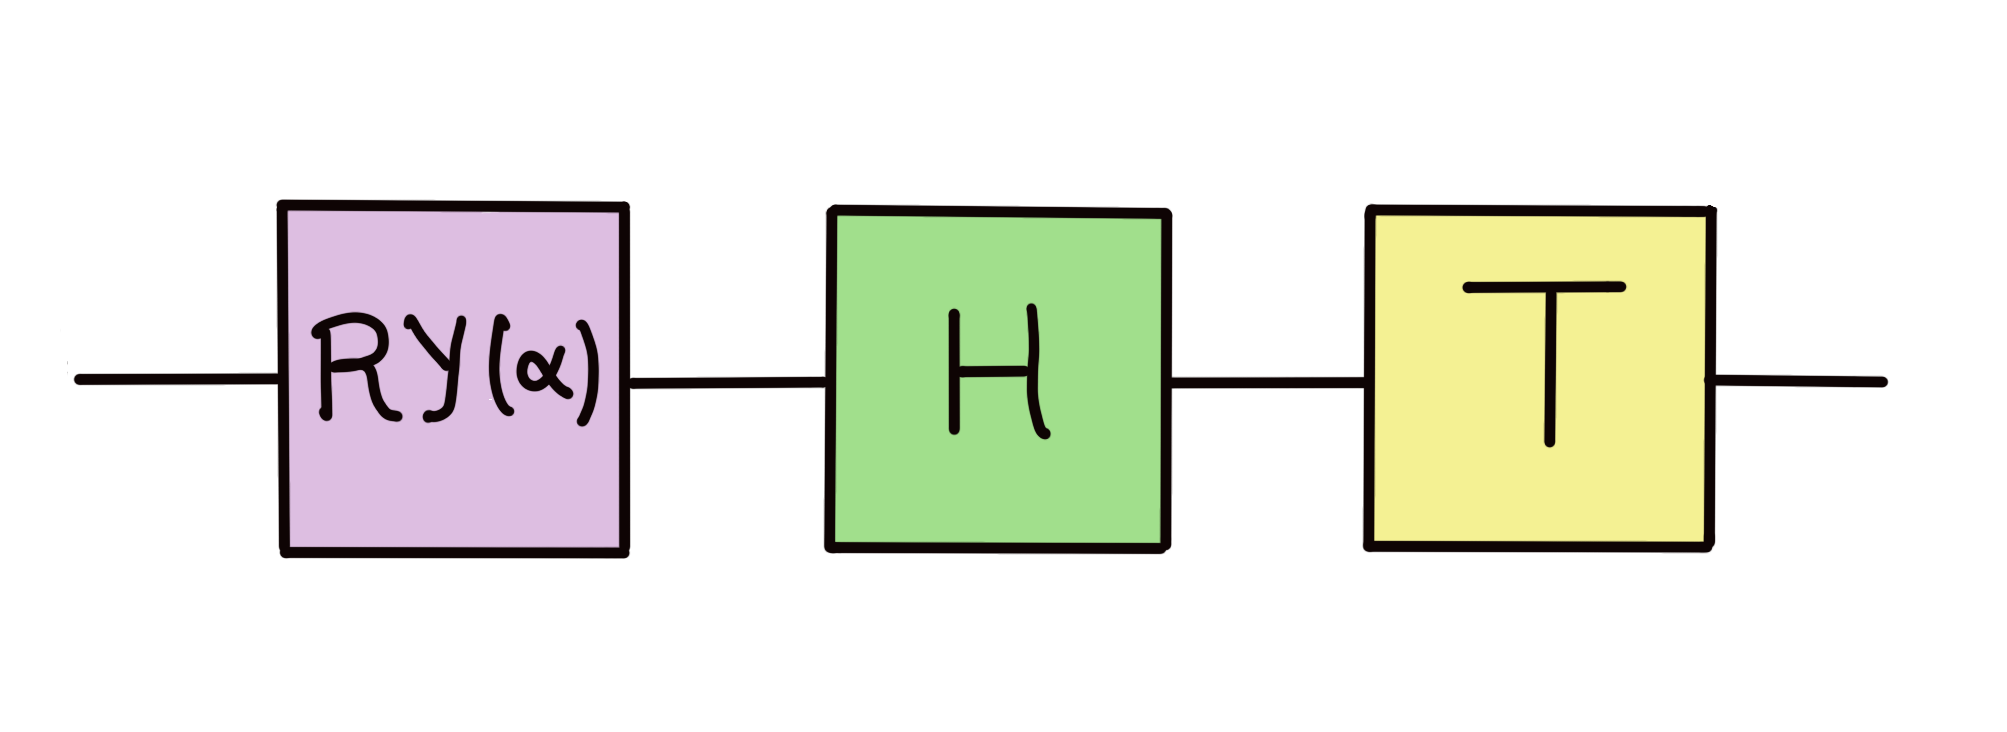">

Given the following one-qubit `circuit` with rotation parameter ,

<img src=" 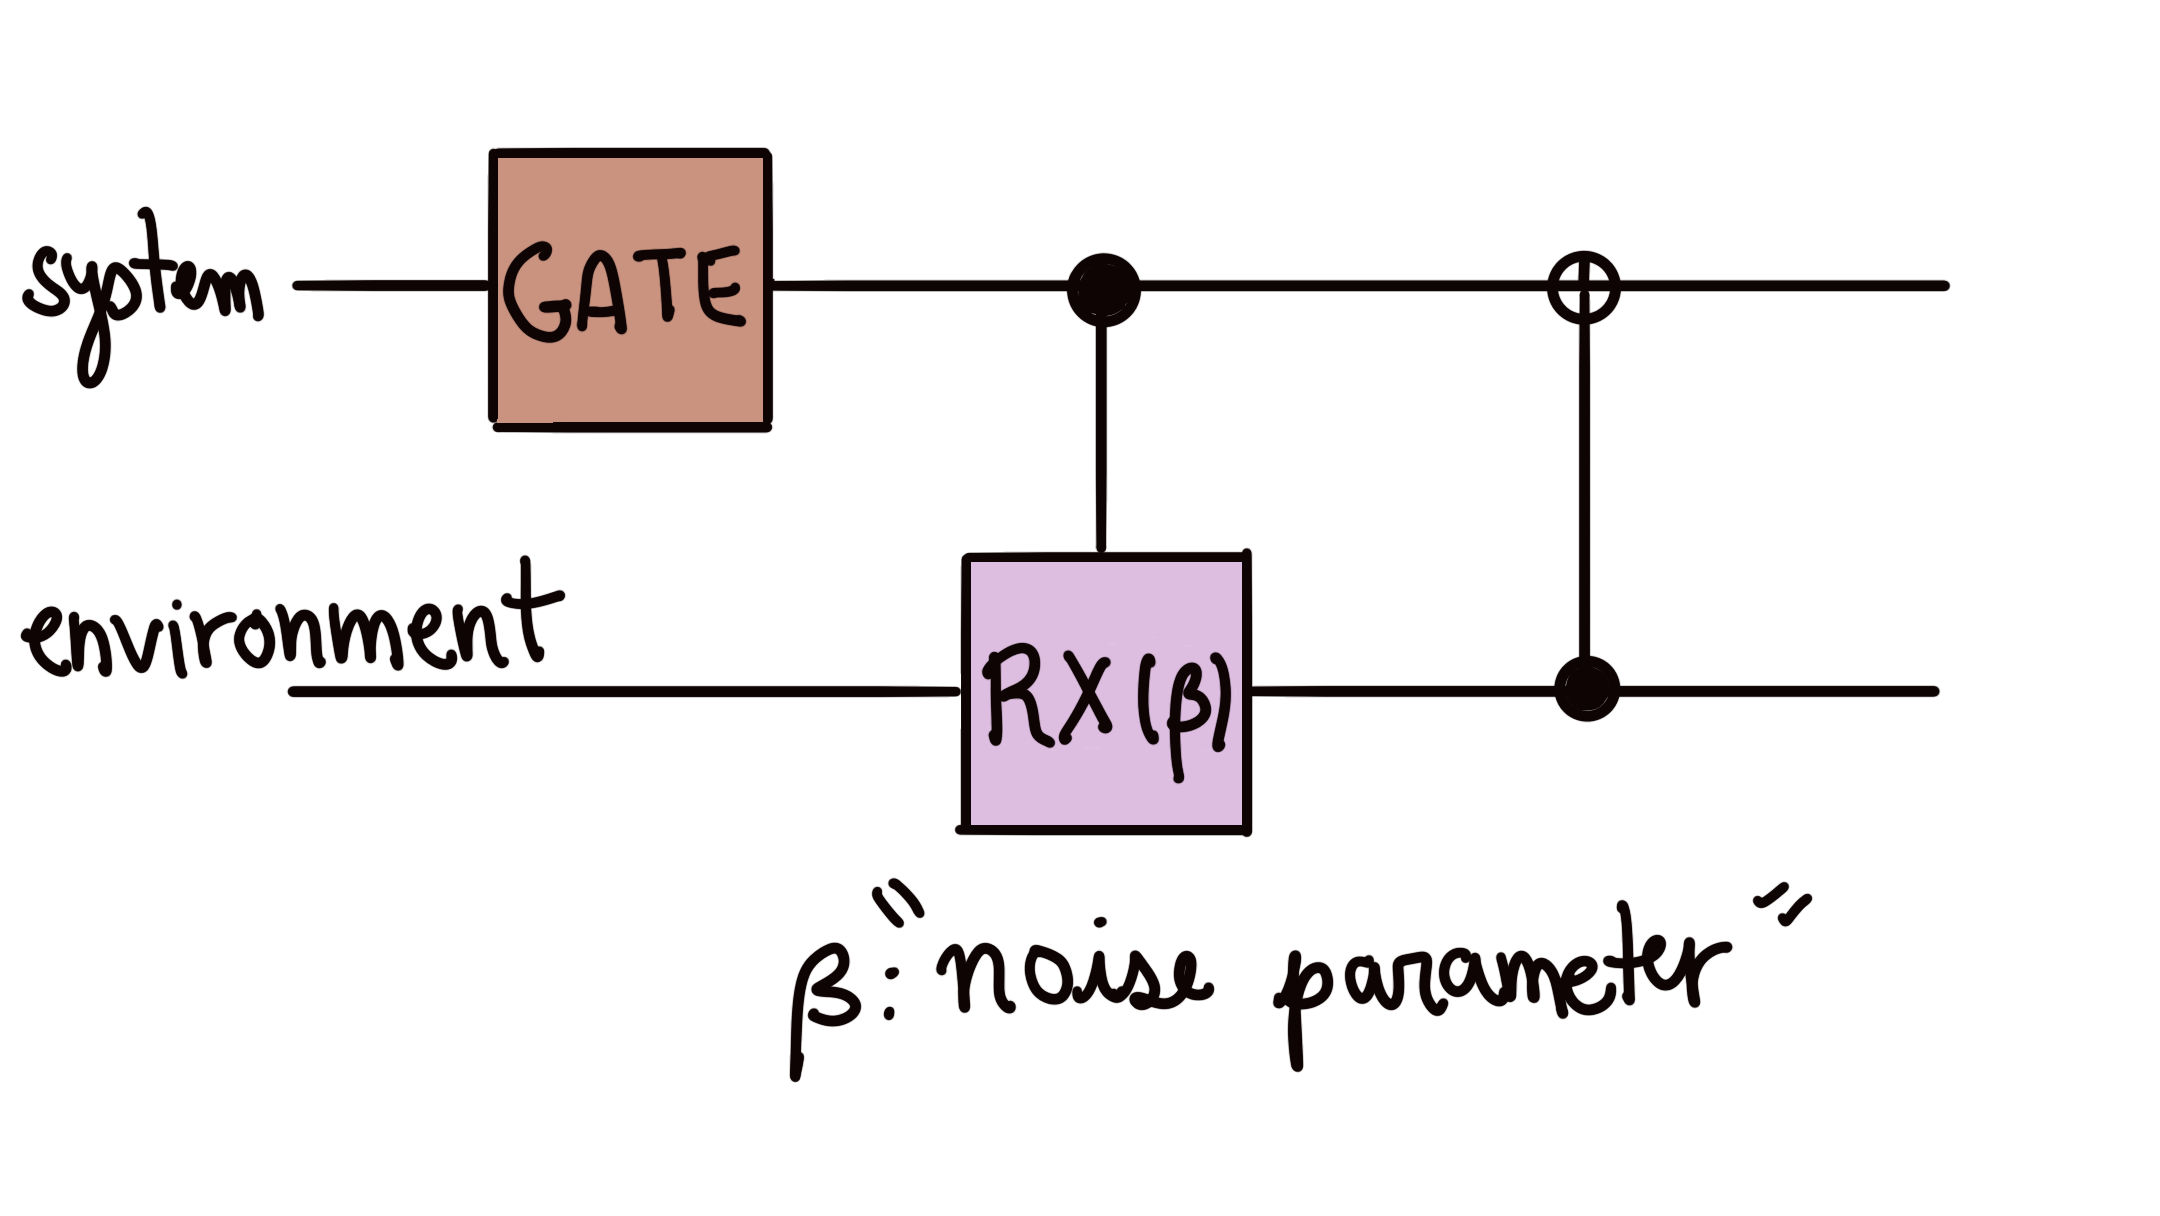">

your task is to create and apply the quantum transform `noise`, which depends on the noise parameter $\beta$, in order to add energy dissipation after each gate in `circuit`.

Our final objective is to **find the purity** $P=Tr(\rho^2)$ of the final state $\rho$ of the one-qubit system. The purity is a measure of how noisy our final state is. If it's close to 1, it means that the state was not affected by external noise.

## Challenge code

You must complete the `state_purity` function to find the purity of the final state of the one-qubit system after dissipating energy. The system's initial state $\ket \psi$ is parametrized by a rotation _angle_ $\theta$ and a _phase_ $\phi$

$$\ket \psi = \cos(\frac{\theta}{2}) \ket 0 + e^{i\phi} \sin(\frac{\theta}{2}) \ket 1$$

The easiest way to solve this probem is to use `qml.transforms.insert` to apply your `noise` transformation to `circuit` to create the `noisy_circuit` QNode.

**Note:** Do not use `transforms` as decorators for this problem. They will yield different results due to how they work on the back-end. Use them within circuits instead.

Assume that the preparation of the initial state _does not_ dissipate energy.

### Input

As input to this problem, you are given:

- `angle` (`float`): The angle $\theta$ parametrizing the initial state
- `phase` (`float`): The phase angle $\phi$ parametrizing the initial state
- `circuit_param` (`float`): The rotation angle $\alpha$ in the $RY$ gate in the `circuit` we add noise to.
- `noise_param` (`float`): The rotation angle in the $\beta$ in the $CRX$ gate in our model for energy dissipation.

### Output

This code will output a `float` corresponding to the purity of the final state of the one-qubit system.

If your solution matches the correct one within the given tolerance specified in `check` (in this case it's an absolute tolerance of `0.01`), the output will be `"Correct!"`. Otherwise, you will receive a `"Wrong answer"` prompt.

Good luck!

In [1]:
import json
import pennylane as qml
import pennylane.numpy as np

In [2]:
def circuit(circuit_param):
    qml.RY(circuit_param, wires=0)
    qml.Hadamard(wires=0)
    qml.T(wires=0)

In [3]:
def state_purity(angle, phase, circuit_param, noise_param):

    """
    This function returns the purity of the output state after adding noise
    to the given circuit().

    Args:
        angle (float): The angle theta that parametrizes the initial quantum state
        phase (float): The phase phi that parametrizes the initial quantum state
        circuit_param (float): The angle that paramterizes the RY rotation in circuit(alpha)
        noise_param (float): The angle that paramterizes the CRX gate in the circuit modelling the noise

    Returns:
        (float): Purity of the state after going through the noisy circuit
    """

    def noise(noise_param, wires):

        """Implements the circuit that models the noise added after each gate. Do not return anything."""
        # Apply CRX and CX
        qml.CRX(noise_param, wires= [k for k in wires[::-1]] )
        qml.CNOT(wires = wires)

    dev = qml.device("default.mixed", wires=2)

    @qml.qnode(dev)
    def noisy_circuit(angle, phase, circuit_param, noise_param):

        """Implements transformed circuit with state preparation at the beginning, and noise inserted
        after each gate.

        Returns: Whatever is useful for you to calculate the purity!"""

        # Put your code here #
        # Don't forget to prepare the initial state
        # If you use a quantum transform to add noise, use it within this circuit
        # STATEPREP----RY(alpha)-----H-------T-----
        #                         |       |       |
        #                       NOISE   NOISE   NOISE

        # STATE PREPARATION:
        qml.RX(angle, wires = 0)
        qml.PhaseShift(- 1.5*np.pi + phase, wires = 0)
        #noise(noise_param, [0,1])

        # RY
        qml.RY(circuit_param, wires = 0)
        noise(noise_param, [1,0])
        
        # HADAMARD
        qml.Hadamard(wires = 0)
        noise(noise_param, [1,0])

        # T
        qml.T(wires = 0)
        noise(noise_param, [1,0])

        return qml.density_matrix(wires = 0)

        
    # Feel free to add here any code or helper functions, if you need them.
    rho = noisy_circuit(angle, phase, circuit_param, noise_param)
    rho_squared = rho @ rho
    return np.trace(rho_squared) # Return the purity in terms of the calculated expectation values.


In [4]:
# These functions are responsible for testing the solution.

def run(test_case_input: str) -> str:

    ins = json.loads(test_case_input)
    output = state_purity(*ins)

    return str(np.real_if_close(output))

def check(solution_output: str, expected_output: str) -> None:
    """
    Compare solution with expected.

    Args:
            solution_output: The output from an evaluated solution. Will be
            the same type as returned.
            expected_output: The correct result for the test case.

    Raises:
            ``AssertionError`` if the solution output is incorrect in any way.
    """

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-2
    ), "Your calculated purity isn't quite right."


In [5]:
test_cases = [['[0.1,0.2,0.3,0.4]', '0.9647'], ['[0.5,0.3,0.5,0.7]', '0.928356']]

In [6]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[0.1,0.2,0.3,0.4]'...
Correct!
Running test case 1 with input '[0.5,0.3,0.5,0.7]'...
Correct!
